**SADIA ISLAM**
ID : 18-36880-1
Updated Assignment

In [19]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau

import os
import numpy as np
import matplotlib.pyplot as plt

os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline


In [7]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170500096/170498071 [==============================] - 6s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
SEED = 1000
BATCH_SIZE = 256
IMG_SIZE=32;

X_train = np.array(X_train)
X_test = np.array(X_test)

X_train = X_train/ 255
X_test = X_test/ 255

In [9]:
train_gen_low_agmentation = ImageDataGenerator(
    # set range for random shear
    shear_range=0.2,
    # set range for random zoom
    zoom_range=0.3,
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    validation_split=0.1,
    dtype=tf.float32
    )
    
train_gen_high_agmentation = ImageDataGenerator(
    # set input mean to 0 over the dataset
    featurewise_center=False,
    # set each sample mean to 0
    samplewise_center=False,
    # divide inputs by std of dataset
    featurewise_std_normalization=False,
    # divide each input by its std
    samplewise_std_normalization=False,
    # apply ZCA whitening
    zca_whitening=False,
    # epsilon for ZCA whitening
    zca_epsilon=1e-06,
    # randomly rotate images in the range (deg 0 to 180)
    rotation_range=60,
    # randomly shift images horizontally
    width_shift_range=0.2,
    # randomly shift images vertically
    height_shift_range=0.2,
    # set range for random shear
    shear_range=0.2,
    # set range for random zoom
    zoom_range=0.3,
    # set range for random channel shifts
    channel_shift_range=0.,
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    # value used for fill_mode = "constant"
    cval=0.,
    # randomly flip images
    horizontal_flip=True,
    # randomly flip images
    vertical_flip=False,
    # set rescaling factor (applied before any other transformation)
    rescale=None,
        # set function that will be applied on each input
    preprocessing_function=tf.keras.applications.resnet50.preprocess_input,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation 
    
    validation_split=0.1,
    dtype=tf.float32,
)


In [10]:

t_batch_low_agmentation = train_gen_low_agmentation.flow(X_train,Y_train,batch_size = BATCH_SIZE)


t_batch_high_agmentation = train_gen_high_agmentation.flow(X_train,Y_train,batch_size = BATCH_SIZE)

In [17]:
# VGG -16 CNN Architecture

model = keras.Sequential([
    keras.Input(shape=X_train.shape[1:]),
    
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    layers.MaxPool2D(pool_size=(2,2),strides=(2,2)),
    layers.Flatten(),
    layers.Dense(4096,activation="relu"),
    layers.Dense(4096,activation="relu"),
    layers.Dense(10, activation="softmax")
    ])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_52 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 16, 16, 128)       73856     
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 16, 16, 128)       147584    
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 8, 8, 256)        

In [21]:
model=model
model_Low=model
model_heavy=model

In [22]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [23]:
model_Low.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [24]:
model_heavy.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.0001), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

**Without DataAugmentation**

In [25]:
h = model.fit(x=X_train, y=Y_train, epochs=10,validation_split=0.1, batch_size=256,shuffle = True)

Epoch 1/10
176/176 [==============================] - 74s 232ms/step - loss: 1.9892 - accuracy: 0.2218 - val_loss: 1.7338 - val_accuracy: 0.3124
Epoch 2/10
176/176 [==============================] - 36s 205ms/step - loss: 1.6476 - accuracy: 0.3596 - val_loss: 1.5284 - val_accuracy: 0.4208
Epoch 3/10
176/176 [==============================] - 36s 205ms/step - loss: 1.4628 - accuracy: 0.4467 - val_loss: 1.3753 - val_accuracy: 0.4944
Epoch 4/10
176/176 [==============================] - 36s 206ms/step - loss: 1.3023 - accuracy: 0.5176 - val_loss: 1.2256 - val_accuracy: 0.5438
Epoch 5/10
176/176 [==============================] - 36s 206ms/step - loss: 1.1357 - accuracy: 0.5832 - val_loss: 1.1243 - val_accuracy: 0.5914
Epoch 6/10
176/176 [==============================] - 36s 206ms/step - loss: 1.0035 - accuracy: 0.6363 - val_loss: 1.0189 - val_accuracy: 0.6280
Epoch 7/10
176/176 [==============================] - 36s 206ms/step - loss: 0.8917 - accuracy: 0.6785 - val_loss: 1.0164 - val_ac

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 7s 20ms/step - loss: 0.9206 - accuracy: 0.6987

Test accuracy: 0.6987000107765198


**Heavy Augmentation**

In [27]:

h_heavy_agmentation = model_heavy.fit(t_batch_high_agmentation, 
              epochs=10,
              steps_per_epoch = X_train.shape[0] 
              verbose=1
             )

Epoch 1/10
195/195 [==============================] - 48s 244ms/step - loss: 3.6154 - accuracy: 0.0978
Epoch 2/10
195/195 [==============================] - 46s 234ms/step - loss: 2.3027 - accuracy: 0.1000
Epoch 3/10
195/195 [==============================] - 46s 235ms/step - loss: 2.3027 - accuracy: 0.0976
Epoch 4/10
195/195 [==============================] - 46s 235ms/step - loss: 2.3027 - accuracy: 0.0970
Epoch 5/10
195/195 [==============================] - 46s 235ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 6/10
195/195 [==============================] - 46s 234ms/step - loss: 2.3027 - accuracy: 0.0973
Epoch 7/10
195/195 [==============================] - 46s 236ms/step - loss: 2.3026 - accuracy: 0.0982
Epoch 8/10
195/195 [==============================] - 47s 238ms/step - loss: 2.3026 - accuracy: 0.0961
Epoch 9/10
195/195 [==============================] - 46s 237ms/step - loss: 2.3026 - accuracy: 0.0977
Epoch 10/10
195/195 [==============================] - 46s 237ms/step - l

In [29]:
test_loss, test_acc = model_heavy.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 2.3030 - accuracy: 0.1000

Test accuracy: 0.10000000149011612


**Low Augmentation**

In [30]:
h_low_agmentation = model_Low.fit(t_batch_low_agmentation, 
              epochs=10,
              steps_per_epoch = X_train.shape[0]
              #validation_split=0.1,
              #callbacks=lr_scheduler,
              verbose=1
             )

Epoch 1/10
195/195 [==============================] - 40s 205ms/step - loss: 2.3027 - accuracy: 0.0988
Epoch 2/10
195/195 [==============================] - 40s 204ms/step - loss: 2.2667 - accuracy: 0.1176
Epoch 3/10
195/195 [==============================] - 40s 205ms/step - loss: 1.9034 - accuracy: 0.2324
Epoch 4/10
195/195 [==============================] - 40s 205ms/step - loss: 1.7803 - accuracy: 0.2881
Epoch 5/10
195/195 [==============================] - 40s 205ms/step - loss: 1.6640 - accuracy: 0.3584
Epoch 6/10
195/195 [==============================] - 40s 206ms/step - loss: 1.3713 - accuracy: 0.4863
Epoch 7/10
195/195 [==============================] - 40s 205ms/step - loss: 1.1766 - accuracy: 0.5791
Epoch 8/10
195/195 [==============================] - 40s 206ms/step - loss: 1.0064 - accuracy: 0.6455
Epoch 9/10
195/195 [==============================] - 40s 206ms/step - loss: 0.9114 - accuracy: 0.6777
Epoch 10/10
195/195 [==============================] - 40s 207ms/step - l

In [31]:
test_loss, test_acc = model_Low.evaluate(X_test, Y_test)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 6s 20ms/step - loss: 0.8977 - accuracy: 0.6864

Test accuracy: 0.6863999962806702


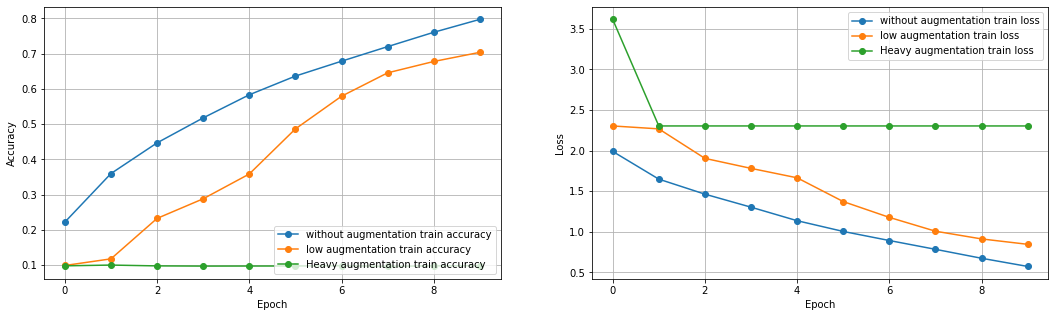

In [32]:

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='without augmentation train accuracy')
plt.plot(h_low_agmentation.history['accuracy'], 'o-', label='low augmentation train accuracy')
plt.plot(h_heavy_agmentation.history['accuracy'], 'o-', label='Heavy augmentation train accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='without augmentation train loss')
plt.plot(h_low_agmentation.history['loss'], 'o-', label='low augmentation train loss')
plt.plot(h_heavy_agmentation.history['loss'], 'o-', label='Heavy augmentation train loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

**Discussion**

Without data augmentation, the training accuracy is higher. The accuracy of less data augmentation is higher than heavy data augmentation.